# Halcyon - Aerospace Team Graz - 2023

Launched at EuRoC'23, allowing the team to become the Overall Champions.
Permission to use flight data given by Dorothea Krasser, 2024.

These results were extracted out of the flight card:

1. Team number: `1`
2. Launch date: `October 13th, 2023. around 14hrs local time`
3. Last simulated apogee before flight: `3163 m` (this value differs from the simulation shown below because of the updates to rocketpy software)
4. Official recorded apogee: `3450 m`

The relative error of altitude apogee is only `9.1%`


In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from rocketpy import Function, Environment, Flight, Rocket
from rocketpy.motors import CylindricalTank, Fluid, HybridMotor
from rocketpy.motors.tank import MassFlowRateBasedTank
import datetime
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-colorblind")

In [10]:
tomorrow = datetime.date(2023, 10, 13) + datetime.timedelta(days=1)

Env = Environment(
    latitude=39.388692,
    longitude=-8.287814,
    elevation=130,
)

The team preferred to set a custom atmospheric model. However, for better resolution, this examples will only run the windy atmosphere that was registered in windy. 

In [11]:
Env.set_date((tomorrow.year, tomorrow.month, tomorrow.day, 12))

Env.set_atmospheric_model(
    type="custom_atmosphere",
    pressure=None,
    temperature=300,
    wind_u=[(0, 8), (1000, 10)],
    wind_v=[(0, 0), (500, 0), (1600, 0)],
)

Env.max_expected_height = 5000


Gravity Details

Acceleration of gravity at surface level:    9.8008 m/s²
Acceleration of gravity at   5.000 km (ASL): 9.7857 m/s²


Launch Site Details

Launch Date: 2023-10-14 12:00:00 UTC
Launch Site Latitude: 39.38869°
Launch Site Longitude: -8.28781°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 44507.97 W    4373270.52 N
Launch Site UTM zone: 30S
Launch Site Surface Elevation: 130.0 m


Atmospheric Model Details

Atmospheric Model Type: custom_atmosphere
custom_atmosphere Maximum Height: 5.000 km

Surface Atmospheric Conditions

Surface Wind Speed: 8.29 m/s
Surface Wind Direction: 270.00°
Surface Wind Heading: 90.00°
Surface Pressure: 997.99 hPa
Surface Temperature: 300.00 K
Surface Air Density: 1.159 kg/m³
Surface Speed of Sound: 347.22 m/s


Earth Model Details

Earth Radius at Launch site: 6369.57 km
Semi-major Axis: 6378.14 km
Semi-minor Axis: 6356.75 km
Flattening: 0.0034


Atmospheric Model Plots



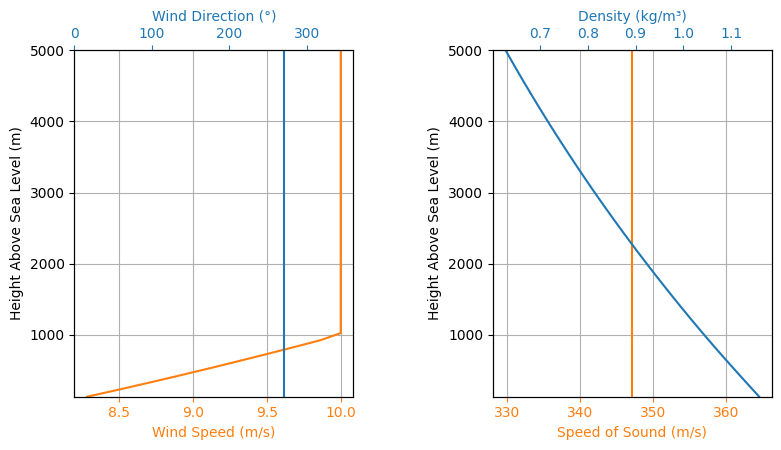

In [12]:
Env.info()

## Environment


Gravity Details

Acceleration of gravity at surface level:    9.8066 m/s²
Acceleration of gravity at   4.000 km (ASL): 9.8066 m/s²


Launch Site Details

Launch Date: 2023-10-13 13:00:00 UTC | 2023-10-13 14:00:00 Portugal
Launch Site Latitude: 39.38869°
Launch Site Longitude: -8.28781°
Reference Datum: WGS84
Launch Site UTM coordinates: 44507.97 W    4373270.52 N
Launch Site UTM zone: 30S
Launch Site Surface Elevation: 130.0 m


Atmospheric Model Details

Atmospheric Model Type: Reanalysis
Reanalysis Maximum Height: 4.000 km
Reanalysis Time Period: from 2023-10-12 08:00:00 to 2023-10-15 18:00:00 utc
Reanalysis Hour Interval: 1 hrs
Reanalysis Latitude Range: From 40.0° to 39.0°
Reanalysis Longitude Range: From -9.0° to -7.0°

Surface Atmospheric Conditions

Surface Wind Speed: 160.86 m/s
Surface Wind Direction: 340.86°
Surface Wind Heading: 3.80°
Surface Pressure: 1000.00 hPa
Surface Temperature: 296.79 K
Surface Air Density: 1.174 kg/m³
Surface Speed of Sound: 345.36 m/s


Earth Model

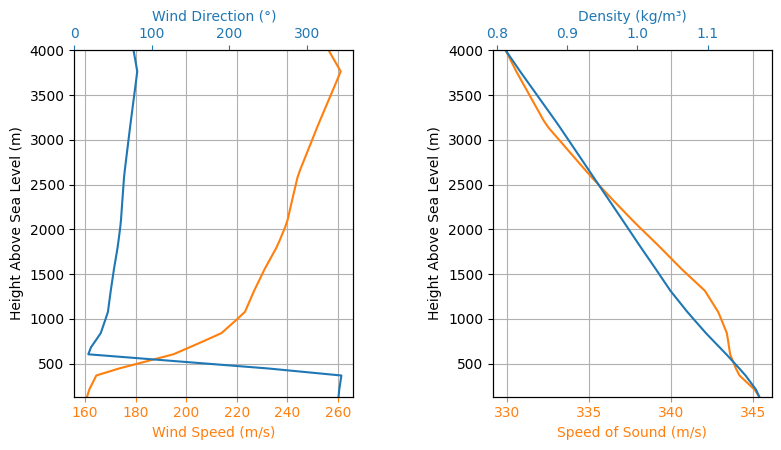

In [13]:
env = Environment(
    gravity=9.80665,
    date=(2023, 10, 13, 14),
    latitude=39.388692,
    longitude=-8.287814,
    elevation=130,
    datum="WGS84",
    timezone="Portugal",
)

# env.set_atmospheric_model(type="Windy", file="ECMWF")
# env.max_expected_height = 4000
# env.info()

env.set_atmospheric_model(
    type="Reanalysis",
    file="../../data/weather/euroc_2023_all_windows.nc",
    dictionary="ECMWF",
)
env.max_expected_height = 4000
env.info()

## Motor

In [14]:
oxidizer_liq = Fluid(name="N2O_l", density=960)
oxidizer_gas = Fluid(name="N2O_g", density=1.9277)

tank_shape = CylindricalTank(70 / 1000, 320 / 1000)

oxidizer_tank = MassFlowRateBasedTank(
    name="oxidizer_tank",
    geometry=tank_shape,
    flux_time=(5),
    initial_liquid_mass=4.2,
    initial_gas_mass=0,
    liquid_mass_flow_rate_in=0,
    liquid_mass_flow_rate_out=4.2 / 5,
    gas_mass_flow_rate_in=0,
    gas_mass_flow_rate_out=0,
    liquid=oxidizer_liq,
    gas=oxidizer_gas,
)

hybrid_motor = HybridMotor(
    thrust_source="../../data/rockets/astg/engine_Halcyon_4thHotfire.eng",
    dry_mass=10670 / 1000,
    dry_inertia=(1.668, 1.668, 0.026),
    center_of_dry_mass_position=780 / 1000,
    burn_time=5,
    reshape_thrust_curve=False,
    grain_number=1,
    grain_separation=0,
    grain_outer_radius=43 / 1000,
    grain_initial_inner_radius=22.5 / 1000,
    grain_initial_height=310 / 1000,
    grain_density=920,
    nozzle_radius=0.0141,
    throat_radius=0.00677,
    interpolation_method="linear",
    grains_center_of_mass_position=385 / 1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

hybrid_motor.add_tank(tank=oxidizer_tank, position=934.75 / 1000)

Nozzle Details
Outlet Radius: 0.0141 m
Throat Radius: 0.00677 m
Outlet Area: 0.000625 m²
Throat Area: 0.000144 m²
Position: 0 m

Grain Details
Number of Grains: 1
Grain Spacing: 0 m
Grain Density: 920 kg/m3
Grain Outer Radius: 0.043 m
Grain Inner Radius: 0.0225 m
Grain Height: 0.31 m
Grain Volume: 0.001 m3
Grain Mass: 1.203 kg

Motor Details
Total Burning Time: 5 s
Total Propellant Mass: 5.403 kg
Average Propellant Exhaust Velocity: 1805.600 m/s
Average Thrust: 1951.160 N
Maximum Thrust: 2127.473 N at 0.2503 s after ignition.
Total Impulse: 9755.800 Ns



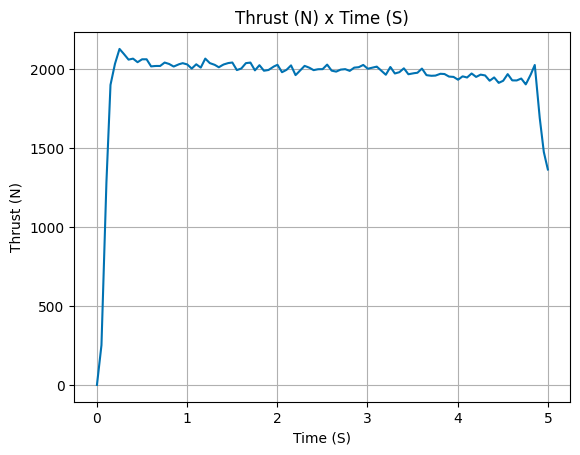

In [15]:
hybrid_motor.info()

## Rocket and Aerodynamic surfaces

In [17]:
HALCYON = Rocket(
    radius=152.4 / 2000,
    mass=14613 / 1000,
    inertia=(24.56, 24.56, 70.074),
    center_of_mass_without_motor=2344 / 1000,
    power_off_drag="../../data/rockets/astg/DragCoeffOR_off.csv",
    power_on_drag="../../data/rockets/astg/DragCoeffOR_on.csv",
    coordinate_system_orientation="tail_to_nose",
)

HALCYON.set_rail_buttons(2.808, 1.549)

HALCYON.add_motor(hybrid_motor, position=20 / 1000)

In [18]:
NoseCone = HALCYON.add_nose(length=0.46, kind="vonKarman", position=3556 / 1000)

FinSet = HALCYON.add_trapezoidal_fins(
    n=4,
    span=0.125,
    root_chord=0.247,
    tip_chord=0.045,
    position=0.263,
)

Tail = HALCYON.add_tail(
    top_radius=152.4 / 2000, bottom_radius=0.0496, length=0.254, position=0.254
)

In [19]:
Main = HALCYON.add_parachute(
    name="Main",
    cd_s=9.621,
    trigger="apogee",
    sampling_rate=100,
    lag=5,
)

## Flight Simulation Data

In [20]:
test_flight = Flight(
    rocket=HALCYON, environment=env, inclination=85, heading=90, rail_length=12
)


Apogee State

Apogee Time: 26.363 s
Apogee Altitude: 3342.856 m (ASL) | 3212.856 m (AGL)
Apogee Freestream Speed: 19.943 m/s
Apogee X position: 765.047 m
Apogee Y position: -351.735 m
Apogee latitude: 39.3855277°
Apogee longitude: -8.2789101°


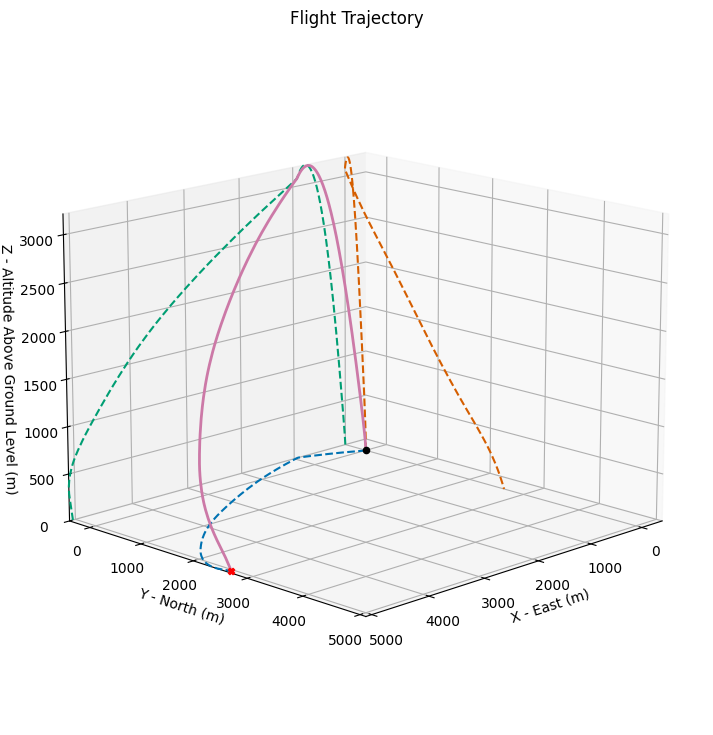

In [21]:
test_flight.prints.apogee_conditions()
test_flight.plots.trajectory_3d()

## Data analysis

In [23]:
from rocketpy.simulation.flight_data_importer import FlightDataImporter


columns_map = {
    "ts": "time",
    "filtered_altitude_AGL": "altitude",
    "filtered_acceleration": "az",
}

cots_altimeter_flight = FlightDataImporter(
    name="COTS Altimeter Flight",
    paths="../../data/rockets/astg/altimeter_halcyon.csv",
    columns_map=columns_map,
    units=None,
    interpolation="linear",
    extrapolation="zero",
    delimiter=",",
    encoding="utf-8",
)

The following attributes were create and are now available to be used:  ['time', 'altitude', 'az']


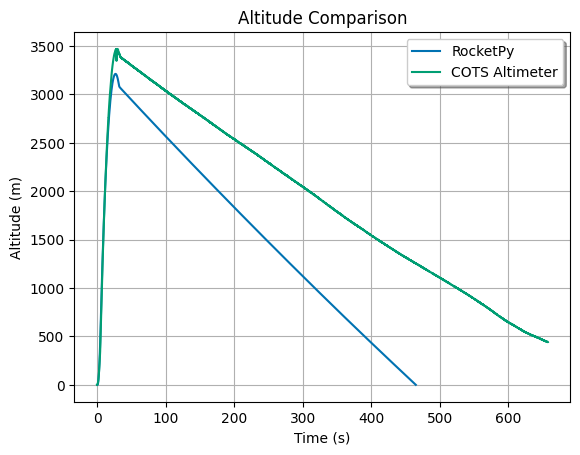

In [24]:
Function.compare_plots(
    [
        (test_flight.altitude, "RocketPy"),
        (cots_altimeter_flight.altitude, "COTS Altimeter"),
    ],
    title="Altitude Comparison",
    xlabel="Time (s)",
    ylabel="Altitude (m)",
)

In [26]:
columns_map = {
    "ts": "time",
    "latitude": "latitude",
    "longitude": "longitude",
}

cots_gnss_flight = FlightDataImporter(
    name="COTS GNSS Flight",
    paths="../../data/rockets/astg/gnss_halcyon.csv",
    columns_map=columns_map,
    interpolation="linear",
    extrapolation="zero",
    delimiter=",",
    encoding="utf-8",
)

The following attributes were create and are now available to be used:  ['time', 'latitude', 'longitude']


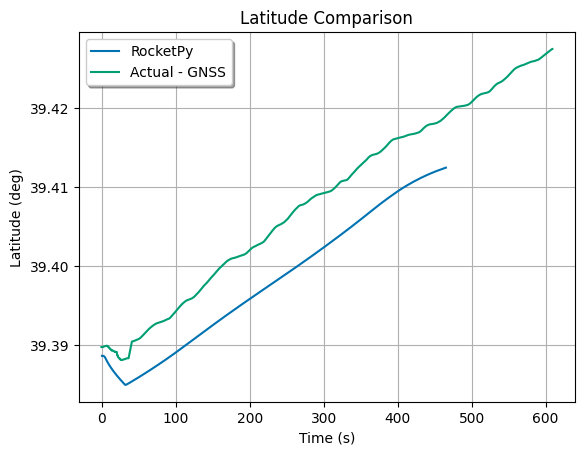

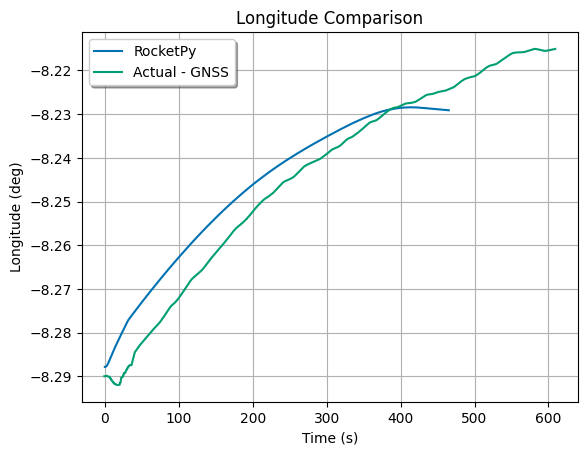

In [27]:
Function.compare_plots(
    [(test_flight.latitude, "RocketPy"), (cots_gnss_flight.latitude, "Actual - GNSS")],
    title="Latitude Comparison",
    xlabel="Time (s)",
    ylabel="Latitude (deg)",
)
Function.compare_plots(
    [
        (test_flight.longitude, "RocketPy"),
        (cots_gnss_flight.longitude, "Actual - GNSS"),
    ],
    title="Longitude Comparison",
    xlabel="Time (s)",
    ylabel="Longitude (deg)",
)